<a href="https://colab.research.google.com/github/rafflds/An-lise-agrupamento-cart-o-cr-dito/blob/main/Credit_Risk_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Informações da base de dados

**Base de dados:** https://www.kaggle.com/datasets/laotse/credit-risk-dataset

**Objetivo**: Bons ou maus pagadores de empréstimos.

## Importação das bibliotecas

In [1]:
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Explorando a base de dados

In [24]:
base_credit = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Bases de dados/credit_data.csv')
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [27]:
# Mudar o nomes das tabelas
base_credit.columns = ['IdCliente', 'renda', 'idade', 'emprestimo','inadiplencia']
base_credit.head()

,IdCliente,renda,idade,emprestimo,inadiplencia
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


## Estatística da base de dados

* Total de 2mil linhas
* Tabela idade faltando 3 registros, com idade mínima de -52 anos

In [28]:
base_credit.describe()

,IdCliente,renda,idade,emprestimo,inadiplencia
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


## Filtros

In [32]:
# Cliente com maior renda
base_credit[base_credit['renda'] >= 69995]

,IdCliente,renda,idade,emprestimo,inadiplencia
422,423,69995.685578,52.719673,2084.370861,0


In [42]:
# Emprestímos menores que 800
base_credit[base_credit['emprestimo'] <= 800]

,IdCliente,renda,idade,emprestimo,inadiplencia
5,6,24904.064140,57.471607,15.498598,0
22,23,23329.319414,48.576975,222.622299,0
35,36,26289.972307,20.666779,341.146966,0
54,55,24912.842682,49.366371,267.696299,0
66,67,37521.017173,60.541077,8.012076,0
...,...,...,...,...,...
1935,1936,33707.801036,59.917644,321.578931,0
1943,1944,59792.508585,24.187499,660.241453,0
1971,1972,36275.735863,30.308184,644.384195,0
1974,1975,37707.642948,31.344048,268.290971,0


In [44]:
# Quantidade de valores únicos na coluna
np.unique(base_credit['inadiplencia'], return_counts=True)

(array([0, 1]), array([1717,  283]))

## Dashboard

Text(0, 0.5, 'Quantidade')

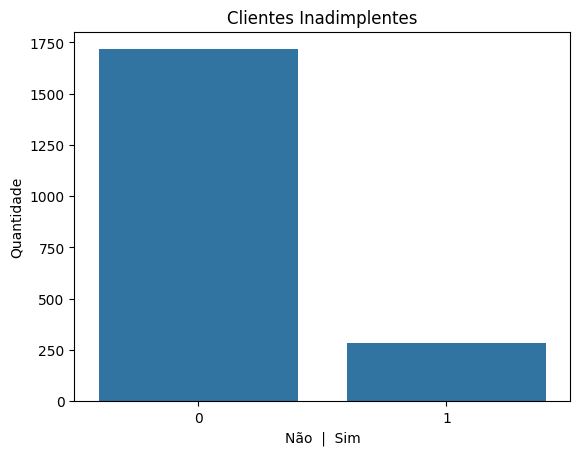

In [49]:
sns.countplot(x = base_credit['inadiplencia'])
plt.title('Clientes Inadimplentes')
plt.xlabel('Não  |  Sim')
plt.ylabel('Quantidade')

* Faixa etária de idade dos clientes desta instituíção está entre 20 e 60 anos.
* Consta registros com idade negativa na base de dados.

Text(0.5, 0, 'Idade')

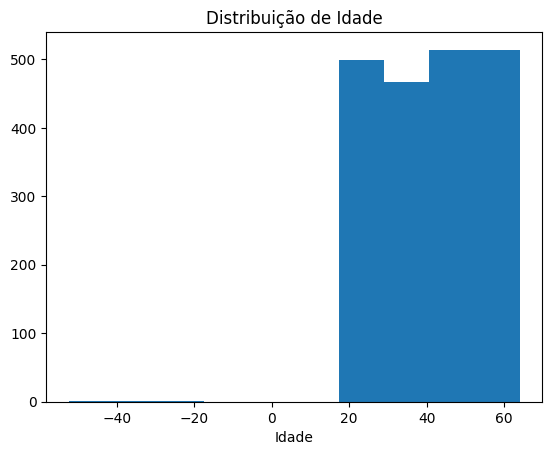

In [50]:
plt.hist(base_credit['idade'])
plt.title('Distribuição de Idade')
plt.xlabel('Idade')

* Mais de 350 pessoas adiquiram empréstimo no valor de 2 mil. Sendo o valor de empréstimo mais requisitado pela instituíção.
* O maior valor requisitado de empréstimo foi de 14 mil. Menos de 50 clientes fizeram essa requisição.

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

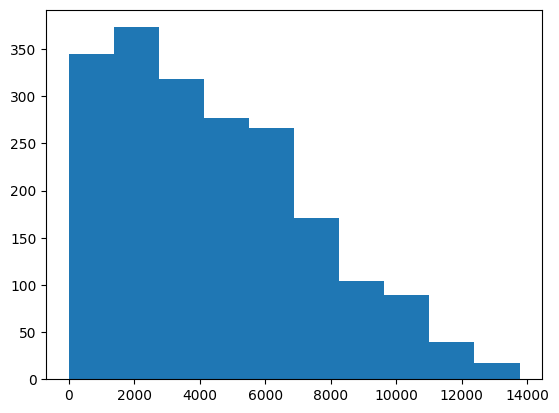

In [51]:
plt.hist(x=base_credit['emprestimo'])

## Tratamento de valores inconsistentes

In [52]:
# Visualizar os valores negativos
base_credit[base_credit['idade'] < 0]

,IdCliente,renda,idade,emprestimo,inadiplencia
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


### 1° Apagando registros

In [54]:
# Apagando somente os registros com valores negativos
base_credit2 = base_credit.drop(base_credit[base_credit['idade'] < 0].index, axis = 0)
base_credit2[base_credit2['idade'] < 0]

,IdCliente,renda,idade,emprestimo,inadiplencia


### 2° Pela média

In [56]:
# Substituir o valores negativos pela média de idade
base_credit['idade'].mean()

40.80755937840458

In [57]:
base_credit.loc[base_credit['idade'] < 0] =40.80
base_credit[base_credit['idade'] < 0]

<ipython-input-57-147d1a3ae398>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '40.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  base_credit.loc[base_credit['idade'] < 0] =40.80


,IdCliente,renda,idade,emprestimo,inadiplencia
